In [ ]:
#This data was extracted from the census bureau database found at
#http://www.census.gov/ftp/pub/DES/www/welcome.html
#Prediction task is to determine whether a person makes over 50K a year.

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix as cm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [61]:
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('adult_train.csv' )
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,24,Private,220323,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,40,United-States,0
1,42,Private,89073,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,48,United-States,0
2,28,Private,51461,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,1887,40,United-States,1
3,41,Private,139907,10th,6,Never-married,Handlers-cleaners,Unmarried,White,Male,0,0,50,United-States,0
4,23,Private,211678,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0


In [3]:
test = pd.read_csv('adult_test.csv' )
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States
1,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States
2,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States
3,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States
4,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States


In [5]:
train['group'] = 'train'
test['group'] = 'test'
test['income'] = np.nan

In [57]:
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,22792.000000,2.279200e+04,22792.000000,22792.000000,22792.000000,22792.000000,22792.000000
mean,38.680809,1.898823e+05,10.091699,1084.095121,86.156371,40.502589,0.244165
std,13.672368,1.057280e+05,2.581006,7298.832597,400.791468,12.349790,0.429600
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.177670e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784825e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.373808e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [58]:
test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,9769.000000,9.769000e+03,9769.000000,9769.000000,9769.00000,9769.000000,0.0
mean,38.350292,1.895359e+05,10.054970,1062.609070,89.98096,40.285495,NaN
std,13.563510,1.051384e+05,2.553231,7583.536614,407.98341,12.341214,NaN
min,17.000000,1.487800e+04,1.000000,0.000000,0.00000,1.000000,NaN
25%,27.000000,1.182590e+05,9.000000,0.000000,0.00000,40.000000,NaN
50%,37.000000,1.780250e+05,10.000000,0.000000,0.00000,40.000000,NaN
75%,47.000000,2.367690e+05,12.000000,0.000000,0.00000,45.000000,NaN
max,90.000000,1.455435e+06,16.000000,99999.000000,3900.00000,99.000000,NaN


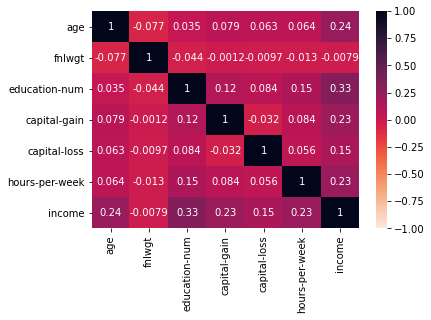

In [71]:
#examine relationships between numerical variables and income
sns.heatmap(train.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

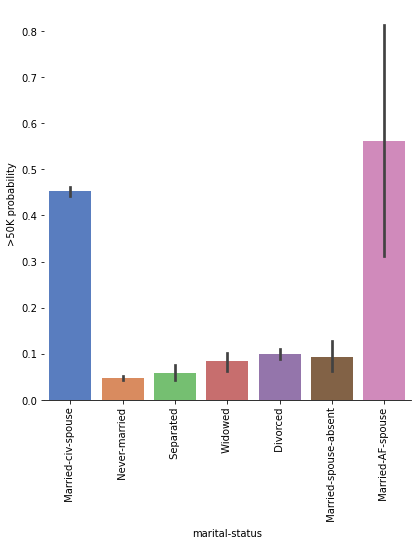

In [70]:
# Explore relationship vs Income
g = sns.factorplot(x="marital-status",y="income",data=train,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
plt.xticks(rotation=90)
g = g.set_ylabels(">50K probability")

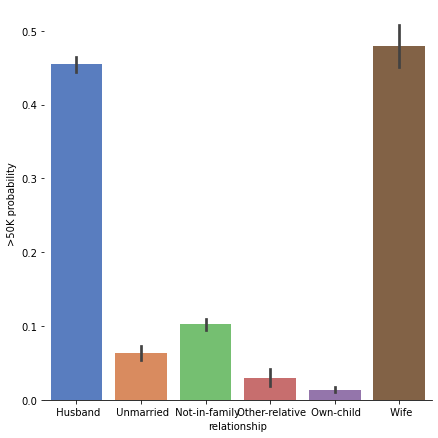

In [62]:
# Explore relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=train,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

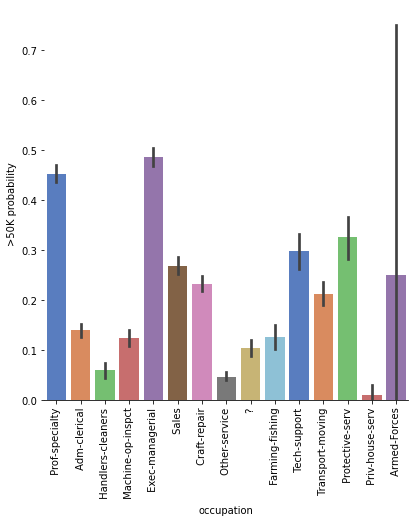

In [66]:
# Explore occupation vs Income
g = sns.factorplot(x="occupation",y="income",data=train, kind="bar", size = 6, palette = "muted")
g.despine(left=True)
plt.xticks(rotation=90)
g = g.set_ylabels(">50K probability")

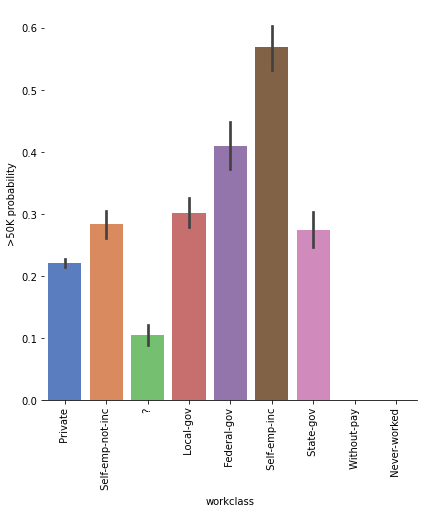

In [67]:
# Explore workclass Num vs Income
g = sns.factorplot(x="workclass",y="income",data=train, kind="bar", size = 6, palette = "muted")
g.despine(left=True)
plt.xticks(rotation=90)
g = g.set_ylabels(">50K probability")

In [6]:
#concatenate train and test for the purpose of data recoding
full = pd.concat([train, test], ignore_index = True)
full.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,group
0,24,Private,220323,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,40,United-States,0.0,train
1,42,Private,89073,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,48,United-States,0.0,train
2,28,Private,51461,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,1887,40,United-States,1.0,train
3,41,Private,139907,10th,6,Never-married,Handlers-cleaners,Unmarried,White,Male,0,0,50,United-States,0.0,train
4,23,Private,211678,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0.0,train


In [7]:
#rename columns
full.columns = ['age', 'workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
             'cap_gain', 'cap_loss', 'hrs_per_wk', 'country', 'income', 'group']
full.head()

,age,workclass,fnlwgt,educ,educ_num,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hrs_per_wk,country,income,group
0,24,Private,220323,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,40,United-States,0.0,train
1,42,Private,89073,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,48,United-States,0.0,train
2,28,Private,51461,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,1887,40,United-States,1.0,train
3,41,Private,139907,10th,6,Never-married,Handlers-cleaners,Unmarried,White,Male,0,0,50,United-States,0.0,train
4,23,Private,211678,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0.0,train


In [ ]:
#workclass, occupation, country contain NANs
#these variables were excluded from modeling
#Note that normally, I would have done something with missing data
#either imputed missing data, or deleted the rows with missing data

In [59]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
group             0
dtype: int64

# Recode dichotomous variables


In [8]:
#dichotomous
full['marital_recode'] = np.where (full['marital_status'].str.contains('Married'), 1, 0)
full['race_recode'] = np.where (full['race'].str.contains('White'), 1, 0)
full['sex_recode'] = np.where (full['sex'].str.contains('Male'), 1, 0)

In [9]:
train_final = full[full['group']=='train' ]
test_final = full[full['group']=='test' ]

# Model building

In [10]:
y = train_final['income']
X = train_final [['age', 'educ_num', 'cap_gain', 'cap_loss', 'hrs_per_wk', 'marital_recode', 'race_recode', 'sex_recode']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [12]:
#logistic regression
lin_clf = LogisticRegression()

In [14]:
accuracy = cross_val_score(lin_clf, X_train, y_train, cv=10, scoring='accuracy')
print("linear model accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))

linear model accuracy: 0.79 (+/- 0.02)


In [16]:
lin_clf.fit(X_train,y_train)
#accuracy on training data for logistic regression
acc_train = lin_clf.score(X_train, y_train).round(4)
#accuracy on test data for logistic regression
acc_test = lin_clf.score(X_test, y_test).round(4)

print('accuracy on training data: ', (acc_train))
print('accuracy on test data: ', (acc_test))

accuracy on training data:  0.791
accuracy on test data:  0.7966


In [17]:
#testing out a different group of variables
y = train_final['income']
X = train_final [['age', 'educ_num', 'hrs_per_wk', 'marital_recode', 'race_recode', 'sex_recode']]
#logistic regression
lin_clf = LogisticRegression()
accuracy = cross_val_score(lin_clf, X_train, y_train, cv=10, scoring='accuracy')
print("linear model accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std() * 2))

linear model accuracy: 0.79 (+/- 0.02)


In [18]:
lin_clf.fit(X_train,y_train)
#accuracy on training data for logistic regression
acc_train = lin_clf.score(X_train, y_train).round(4)
#accuracy on test data for logistic regression
acc_test = lin_clf.score(X_test, y_test).round(4)

print('accuracy on training data: ', (acc_train))
print('accuracy on test data: ', (acc_test))

accuracy on training data:  0.791
accuracy on test data:  0.7966


In [19]:
#decision tree
tree = DecisionTreeClassifier(max_depth=10)

In [20]:
y = train_final['income']
X = train_final [['age', 'educ_num', 'cap_gain', 'cap_loss', 'hrs_per_wk', 'marital_recode', 'race_recode', 'sex_recode']]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [22]:
#kfold cv for decision tree
accuracy_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')
print("dtree accuracy: %0.4f (+/- %0.4f)" % (accuracy_scores.mean(), accuracy_scores.std() * 2))

dtree accuracy: 0.8514 (+/- 0.0086)


In [24]:
tree.fit(X_train, y_train)
#accuracy on training data for decision tree
acc_train = tree.score(X_train, y_train).round(4)
#accuracy on test data for decision tree
acc_test = tree.score(X_test, y_test).round(4)

print('accuracy on training data: ', (acc_train))
print('accuracy on test data: ', (acc_test))

accuracy on training data:  0.8671
accuracy on test data:  0.8475


In [ ]:
#tree parameter tuning
tree = DecisionTreeClassifier(random_state = 1024)

In [ ]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy'],
              'min_samples_leaf' : [5, 10, 15],
              'min_samples_split' : [2, 3, 5]
             }

In [ ]:
clf = GridSearchCV(tree, param_grid, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_)

In [ ]:
#Best parameters found:
# {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 2}

In [25]:
#tuned tree
tree = DecisionTreeClassifier(random_state = 1024,
                             ccp_alpha = 0.001,
                              criterion = 'entropy',
                              max_depth = 9,
                              max_features = 'auto', 
                              min_samples_leaf = 10,
                              min_samples_split = 2
                             )

In [26]:
#kfold cv for decision tree
accuracy_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')
print("dtree accuracy: %0.4f (+/- %0.4f)" % (accuracy_scores.mean(), accuracy_scores.std() * 2))

dtree accuracy: 0.8427 (+/- 0.0173)


In [27]:
tree.fit(X_train, y_train)
#accuracy on training data for decision tree
acc_train = tree.score(X_train, y_train).round(4)
#accuracy on test data for decision tree
acc_test = tree.score(X_test, y_test).round(4)

print('accuracy on training data: ', (acc_train))
print('accuracy on test data: ', (acc_test))

accuracy on training data:  0.8475
accuracy on test data:  0.8466


In [28]:
#random forest
rf_clf = RandomForestClassifier()

In [29]:
#kfold cv for random forest
accuracy_scores = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='accuracy')
print("rf accuracy: %0.4f (+/- %0.4f)" % (accuracy_scores.mean(), accuracy_scores.std() * 2))

rf accuracy: 0.8357 (+/- 0.0106)


In [32]:
rf_clf.fit(X_train, y_train)
#accuracy on training data for random forest
acc_train = rf_clf.score(X_train, y_train).round(4)
#accuracy on test data for random forest
acc_test = rf_clf.score(X_test, y_test).round(4)

print('accuracy on training data: ', (acc_train))
print('accuracy on test data: ', (acc_test))

accuracy on training data:  0.9331
accuracy on test data:  0.8397


In [ ]:
#random forest parameter tuning
rf_clf=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'n_estimators' : [10, 100, 150],
    'max_leaf_nodes' : [10, 50, 100],
    'min_samples_leaf' : [5, 10, 15],
    'min_samples_split' : [2, 5, 10]
}

In [ ]:
rf_clf = GridSearchCV(rf_clf, param_grid, cv=5)
rf_clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', cv_rfc.best_params_)

In [ ]:
#Best parameters found:
# {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 100, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}

In [33]:
#tuned rf
rf_clf = RandomForestClassifier(n_estimators=100,
    max_features='auto',
    max_depth =8,
    criterion = 'gini',
    max_leaf_nodes = 100,
    min_samples_leaf = 5,
    min_samples_split = 2                                

)

In [34]:
#kfold cv for random forest
accuracy_scores = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring='accuracy')
print("rf accuracy: %0.4f (+/- %0.4f)" % (accuracy_scores.mean(), accuracy_scores.std() * 2))

rf accuracy: 0.8530 (+/- 0.0090)


In [35]:
rf_clf.fit(X_train, y_train)
#accuracy on training data for random forest
acc_train = rf_clf.score(X_train, y_train).round(4)
#accuracy on test data for random forest
acc_test = rf_clf.score(X_test, y_test).round(4)

print('accuracy on training data: ', (acc_train))
print('accuracy on test data: ', (acc_test))

accuracy on training data:  0.858
accuracy on test data:  0.8532


In [36]:
#k neighbors classifier
knn = KNeighborsClassifier()

In [37]:
#kfold cv for kNN
accuracy_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print("knn accuracy: %0.4f (+/- %0.4f)" % (accuracy_scores.mean(), accuracy_scores.std() * 2))

knn accuracy: 0.8345 (+/- 0.0155)


In [38]:
knn.fit(X_train, y_train)
#accuracy on training data for kNN
acc_train = knn.score(X_train, y_train).round(4)
#accuracy on test data for decision tree
acc_test = knn.score(X_test, y_test).round(4)

print('accuracy on training data: ', (acc_train))
print('accuracy on test data: ', (acc_test))


accuracy on training data:  0.8781
accuracy on test data:  0.8371


In [ ]:
#knn parameter tuning

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
param_grid = { 
    'n_neighbors': [2, 5, 10, 15],
    'leaf_size': [5, 10, 15, 30],
    }

In [ ]:
knn = GridSearchCV(knn, param_grid, cv=10)
knn.fit(X_train, y_train)

In [ ]:
# Best parameter set
print('Best parameters found:\n', knn.best_params_)

In [ ]:
#Best parameters found:
# {'leaf_size': 10, 'n_neighbors': 10}

In [39]:
#tuned knn
knn = KNeighborsClassifier(leaf_size = 10,
                          n_neighbors = 10)

In [40]:
#kfold cv for kNN
accuracy_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print("knn accuracy: %0.4f (+/- %0.4f)" % (accuracy_scores.mean(), accuracy_scores.std() * 2))

knn accuracy: 0.8456 (+/- 0.0108)


In [41]:
knn.fit(X_train, y_train)
#accuracy on training data for kNN
acc_train = knn.score(X_train, y_train).round(4)
#accuracy on test data for kNN
acc_test = knn.score(X_test, y_test).round(4)

print('accuracy on training data: ', (acc_train))
print('accuracy on test data: ', (acc_test))

accuracy on training data:  0.8667
accuracy on test data:  0.8406


In [42]:
#xgboost
from xgboost import XGBClassifier

In [43]:
xgb_clf = XGBClassifier()

In [44]:
#kfold cv for XGBoost
accuracy_scores = cross_val_score(xgb_clf, X_train, y_train, cv=10, scoring='accuracy')
print("xgboost accuracy: %0.4f (+/- %0.4f)" % (accuracy_scores.mean(), accuracy_scores.std() * 2))

xgboost accuracy: 0.8584 (+/- 0.0115)


In [45]:
xgb_clf.fit(X_train, y_train)
#accuracy on training data for XGBoost
acc_train = xgb_clf.score(X_train, y_train).round(4)
#accuracy on test data for XGBoost
acc_test = xgb_clf.score(X_test, y_test).round(4)

print('accuracy on training data: ', (acc_train))
print('accuracy on test data: ', (acc_test))

accuracy on training data:  0.8826
accuracy on test data:  0.8584


In [ ]:
#xgboost parameter tuning
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xgb = GridSearchCV(xgb_clf, param_grid, cv=5)
xgb.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', xgb.best_params_)

In [ ]:
#Best parameters found:
# {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 1.0}

In [46]:
#tuned xgb
xgb_clf = XGBClassifier(colsample_bytree = 0.6,
                            gamma = 0.5,
                            max_depth = 4, 
                            min_child_weight = 5,
                            subsample = 1.0)

In [47]:
#kfold cv for XGBoost
accuracy_scores = cross_val_score(xgb_clf, X_train, y_train, cv=10, scoring='accuracy')
print("xgboost accuracy: %0.4f (+/- %0.4f)" % (accuracy_scores.mean(), accuracy_scores.std() * 2))

xgboost accuracy: 0.8608 (+/- 0.0097)


In [48]:
xgb_clf.fit(X_train, y_train)
#accuracy on training data for XGBoost
acc_train = xgb_clf.score(X_train, y_train).round(4)
#accuracy on test data for XGBoost
acc_test = xgb_clf.score(X_test, y_test).round(4)

print('accuracy on training data: ', (acc_train))
print('accuracy on test data: ', (acc_test))

accuracy on training data:  0.8681
accuracy on test data:  0.8598


# Creating predictions

In [53]:
X_test_competition = test_final[['age', 'educ_num', 'cap_gain', 'cap_loss', 'hrs_per_wk', 'marital_recode', 'race_recode', 'sex_recode']]

In [49]:
#linear regression
lin_clf.fit(X, y)


LogisticRegression()

In [50]:
preds = pd.DataFrame(lin_clf.predict(X_test_competition))

In [51]:
#xgboost
xgb_clf.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [52]:
preds = pd.DataFrame(xgb_clf.predict(X_test_competition))

In [56]:
len(preds)

9769

In [54]:
preds.columns = ['pred_label']
preds.pred_label.value_counts(normalize=True)

0    0.817586
1    0.182414
Name: pred_label, dtype: float64

In [55]:
#save preds to csv for leaderboard scoring
#name yours with your own initials or however you'd like
preds.to_csv('predictions.csv', header=False)

In [ ]:
#random forest
